# Signal and Image Processing (SIP) SS25

##  Hilbert Transform Tutorial

### Import packages

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

## Analytic Signal

### Define plot function

In [3]:
# Function for plotting the signal, with parameters x (signal) and t (time array)
def plot_x(x,t=None):
    
    # Define figure size
    plt.figure(figsize=(15,5))
    # Plot the signal x in seconds
    if t is not None:
        plt.plot(t,x)
        plt.xlabel('Time (s)')
    else:
        # If no time array is provided, use the index of x as time
        plt.plot(x)
    # Label the axes
    plt.ylabel('Amplitude (a.u.)')
    # Show grid in plot
    plt.grid()
    # Show the plot
    plt.show()

### Generate a sine signal and plot it


For sinusoid formula, see [Wikipedia](https://en.wikipedia.org/w/index.php?title=Sine_wave&oldid=1279161490#Sinusoid_form)

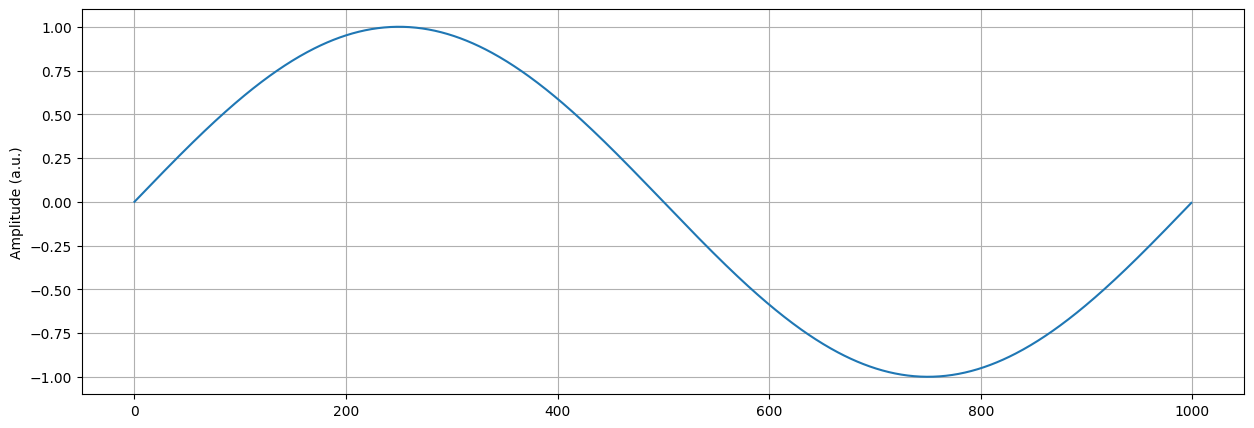

In [41]:
# signal length in seconds
T = 1
# sampling frequency in Hz
fs = 1000
# signal frequency in Hz
f = 1
# signal phase shift in radians
ph = 0


# signal length (samples)
N = int(T*fs)
# samples indices array
n = np.arange(N)
# sample time array
t = np.arange(0, T, 1/fs)
# Add amplitude
A = 1
# sine signal
x = A*np.sin(2*np.pi*f*t+ph)

# plot the signal
plot_x(x)

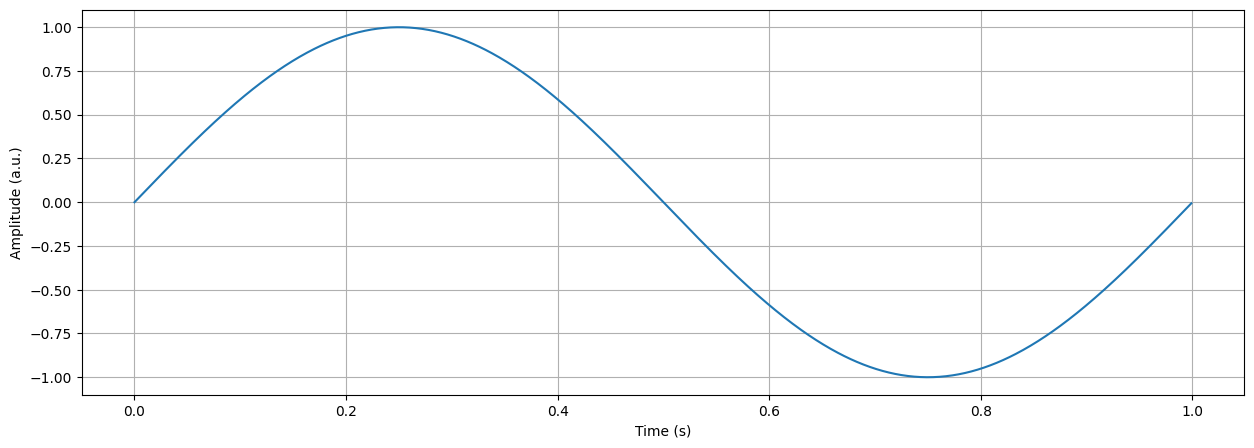

In [42]:
# Plot the signal x
plot_x(x,t)

### Calculate the analytic signal z

In [43]:
def analytic_signal(x):
    # Get the length of the signal x
    N = len(x)
    
    # DFT of signal x
    X = np.fft.fft(x)
    
    # Analytic signal in frequency domain
    Z = np.zeros(N, dtype=complex)
    Z[0:N//2] = 2*X[0:N//2]
    
    # Get analytic signal via iDFT
    z = np.fft.ifft(Z)
    
    return(z)

In [44]:
z = analytic_signal(x)
z

array([ 4.33146057e-17-1.00000000e+00j,  6.28314397e-03-9.99980261e-01j,
        1.25660399e-02-9.99921044e-01j,  1.88484397e-02-9.99822352e-01j,
        2.51300954e-02-9.99684189e-01j,  3.14107591e-02-9.99506560e-01j,
        3.76901827e-02-9.99289473e-01j,  4.39681183e-02-9.99032935e-01j,
        5.02443182e-02-9.98736957e-01j,  5.65185345e-02-9.98401550e-01j,
        6.27905195e-02-9.98026728e-01j,  6.90600257e-02-9.97612506e-01j,
        7.53268055e-02-9.97158900e-01j,  8.15906116e-02-9.96665928e-01j,
        8.78511966e-02-9.96133609e-01j,  9.41083133e-02-9.95561965e-01j,
        1.00361715e-01-9.94951017e-01j,  1.06611154e-01-9.94300790e-01j,
        1.12856385e-01-9.93611311e-01j,  1.19097160e-01-9.92882605e-01j,
        1.25333234e-01-9.92114701e-01j,  1.31564359e-01-9.91307631e-01j,
        1.37790291e-01-9.90461426e-01j,  1.44010783e-01-9.89576119e-01j,
        1.50225589e-01-9.88651745e-01j,  1.56434465e-01-9.87688341e-01j,
        1.62637165e-01-9.86685944e-01j,  1.68833445

### Calculate and plot instantaneous amplitude, phase and frequency

In [45]:
def plot_z(z, t, fs, freq_lim = None):
    
    # Calculate instantaneous amplitude, and real and imaginary part of z
    real_z = np.real(z)
    imag_z = np.imag(z)
    inst_amp = np.abs(z)
    
    # Calculate instantaneous phase
    inst_phase = np.angle(z)
    
    # Calculate instantaneous frequency (convert from radians in Hz)
    inst_freq = np.diff(np.unwrap(inst_phase)) / (2*np.pi)*fs  # rad/sample -> Hz==1/s
    
    # Define figure size
    plt.figure(figsize=(15,10))
    
    # First Subplot with instantaneous amplitude, real and imaginary part of z
    plt.subplot(3,1,1)
    plt.plot(t, real_z, label='real')
    plt.plot(t, imag_z, label='imag')
    plt.plot(t, inst_amp, label='inst amp')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude (a.u.)')
    plt.legend()
    plt.grid()
    
    # Second Subplot with instantaneous phase
    plt.subplot(3,1,2)
    plt.plot(t, inst_phase/np.pi, label='inst phase', color='red')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude (a.u.)')
    plt.legend()
    plt.grid()
    
    # Third Subplot with instantaneous frequency
    plt.subplot(3,1,3)
    plt.plot(t[1:], inst_freq, label='inst freq', color='purple')
    # Set y-lim to avoid rounding errors and computational artefacts
    if freq_lim is not None:
        plt.ylim(freq_lim)
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude (a.u.)')
    plt.legend()
    plt.grid()

### Plot analytic signal z in time domain

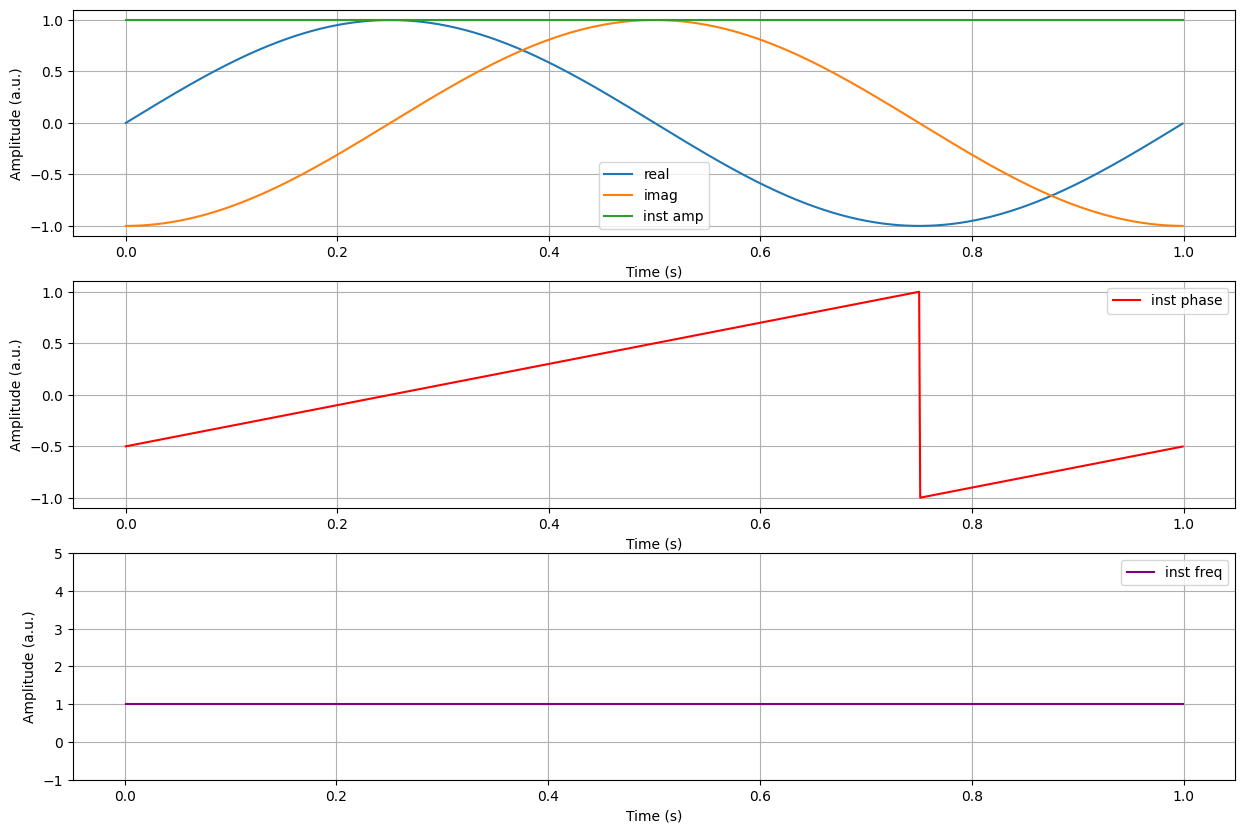

In [46]:
# Plot the instantaneous amplitude, phase and frequency  
plot_z(z, t, fs, [-1,5])

### Plot analytic signal z in complex plane

In [47]:
def plot_analytic_signal_3d(t, analytic_signal):
    """
    Plot the analytic signal in 3D with projections.

    Parameters:
    - t: time array
    - analytic_signal: complex analytic signal (real + j * imag)
    """
    # Increase offsets for better separation
    real_offset = np.max(np.real(analytic_signal)) + 0.4  # Shift Imaginary projection RIGHT
    imag_offset = np.min(np.imag(analytic_signal)) - 0.4  # Real projection further DOWN
    time_offset = -0.3  # Move phasor projection further BACK

    fig = plt.figure(figsize=(12, 10))
    ax = fig.add_subplot(111, projection='3d')

    # --- Colormap setup ---
    norm_t = (t - t.min()) / (t.max() - t.min())
    colors = cm.rainbow(norm_t)

    # --- NEW ORDER: projections first, analytic signal last ---

    # Plot 4: Phasor in Complex Plane (Real vs Imaginary) at Time = time_offset (further back)
    for i in range(len(t)-1):
        ax.plot(
            [time_offset, time_offset],
            [np.real(analytic_signal[i]), np.real(analytic_signal[i+1])],
            [np.imag(analytic_signal[i]), np.imag(analytic_signal[i+1])],
            color=colors[i],
            label='4. Phasor in Complex Plane' if i == 0 else None
        )

    # Plot 2: Real Signal Projection (Real part vs Time) shifted in Imaginary axis (BOTTOM/behind)
    ax.plot(
        t,
        np.real(analytic_signal),
        np.full_like(t, imag_offset),
        color='#1f77b4',
        label='2. Real Signal'
    )

    # Plot 1: Hilbert Transform Projection (Imaginary part vs Time) shifted in Real axis (RIGHT)
    ax.plot(
        t,
        np.full_like(t, real_offset),
        np.imag(analytic_signal),
        color='#ff7f0e',
        label='1. Hilbert Transform Projection'
    )

    # Plot 3: Analytical Signal in 3D (colored with rainbow colormap)
    for i in range(len(t)-1):
        ax.plot(
            [t[i], t[i+1]],
            [np.real(analytic_signal[i]), np.real(analytic_signal[i+1])],
            [np.imag(analytic_signal[i]), np.imag(analytic_signal[i+1])],
            color=colors[i],
            label='3. Analytical Signal' if i == 0 else None
        )

    # Labels & Legend
    ax.set_xlabel('Time Axis (sec)')
    ax.set_ylabel('Real Axis')
    ax.set_zlabel('Imaginary Axis')
    ax.legend(loc='upper left')

    ax.set_xlim([time_offset - 0.1, np.max(t)])
    ax.set_ylim([-1.5, real_offset + 0.5])
    ax.set_zlim([imag_offset - 0.3, 1.5])

    plt.title('Hilbert Transform & Analytic Signal Visualization')
    plt.tight_layout()
    plt.show()

In [48]:
def scatter_z(z):
    colors = cm.rainbow(np.linspace(0,1,len(z)))
    plt.figure(figsize=(10,10))
    plt.axhline(0, c='k')
    plt.axvline(0, c='k')
    plt.scatter(np.real(z), np.imag(z), color=colors)
    plt.xlabel('real(z)')
    plt.ylabel('imag(z)')
    plt.grid()
    plt.show()

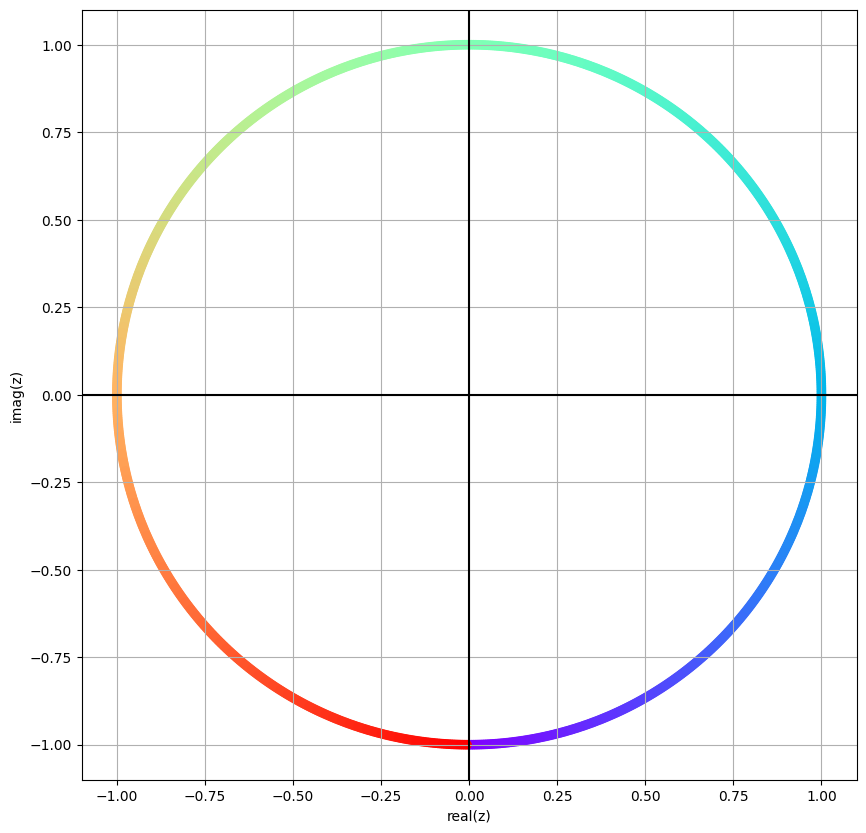

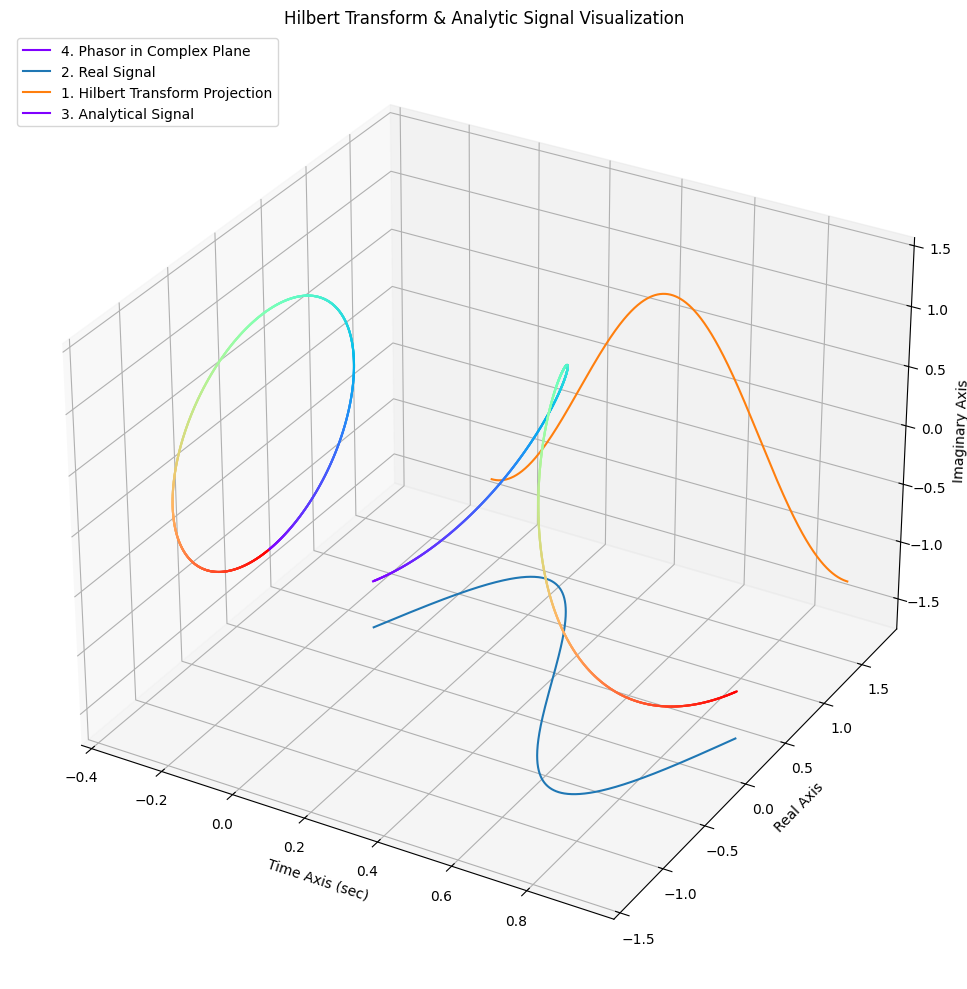

'\nThe signal starts at color purple\n'

In [12]:
# Scatter plot
scatter_z(z) 
plot_analytic_signal_3d(t, z)

'''
The signal starts at color purple
'''

### Signal with 2 frequency components

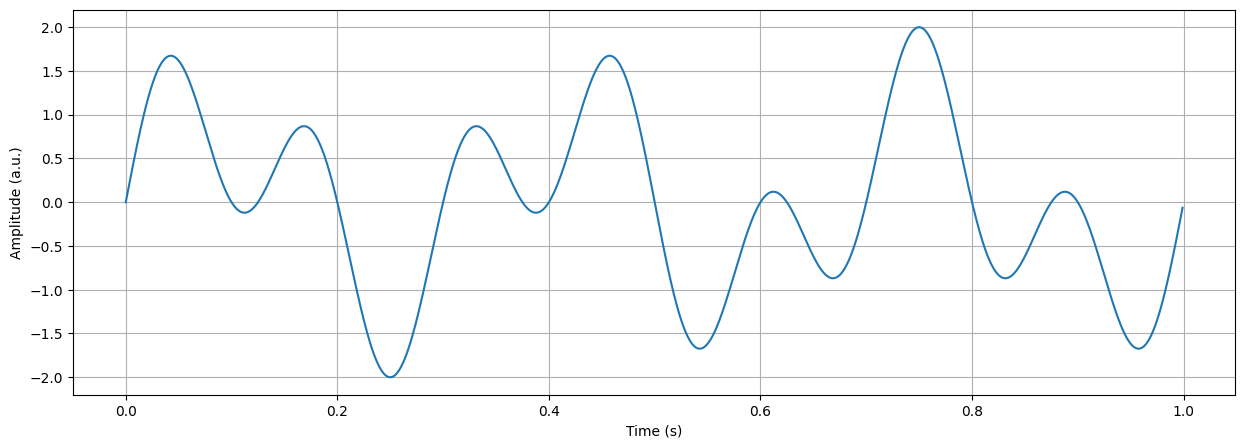

In [13]:
#Two frequency components
f1 = 7
f2 = 3

# Sum of two sine waves
x2 = np.sin(2*np.pi*f1/fs*n) + np.sin(2*np.pi*f2/fs*n)

# Plot the signal
plot_x(x2,t)

### Calculate and plot instantantaneous amplitude, phase and frequency of new signal

'\nSmaller jumps as well --> still spikes after unwrapping\n'

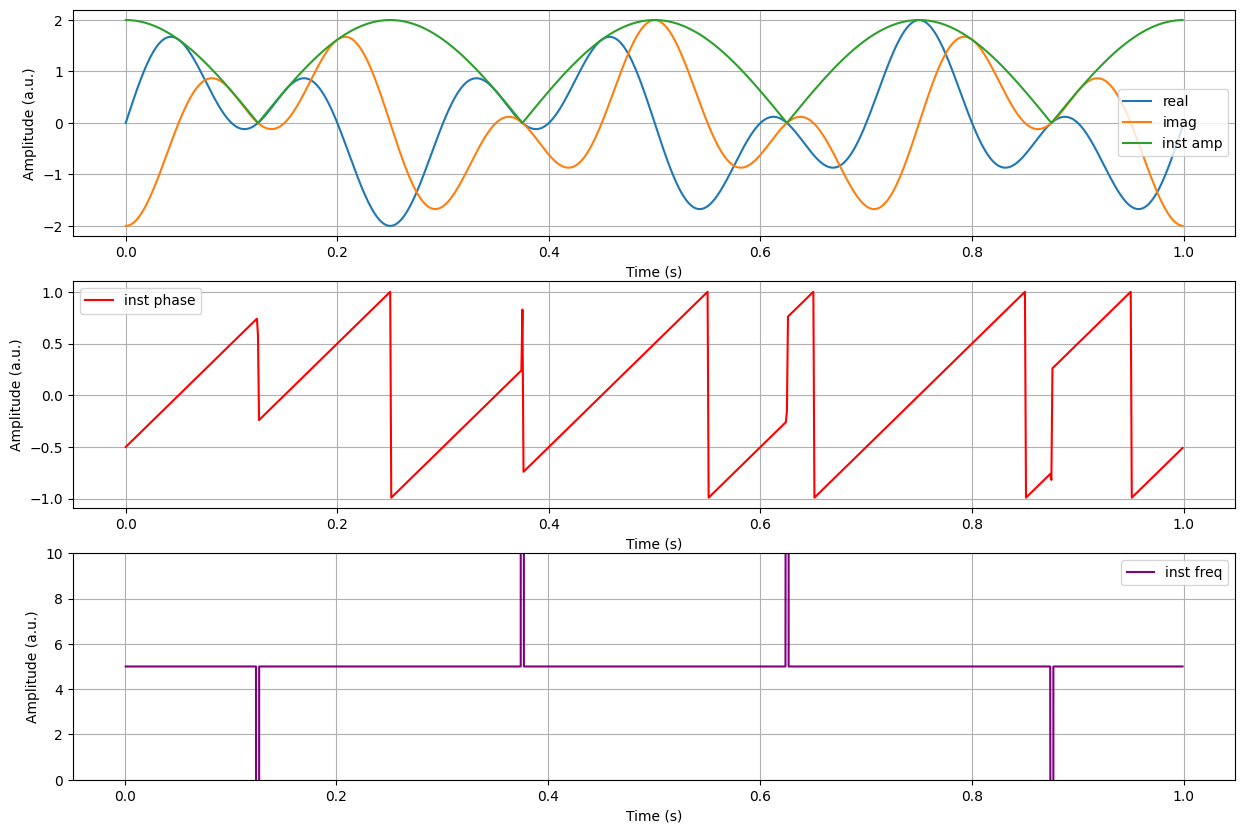

In [14]:
# Calculate z2
z2 = analytic_signal(x2)

# Plot inst ampl, phase and freq
plot_z(z2,t,fs,[0,10])

'''
Smaller jumps as well --> still spikes after unwrapping
'''

### Show complex plane

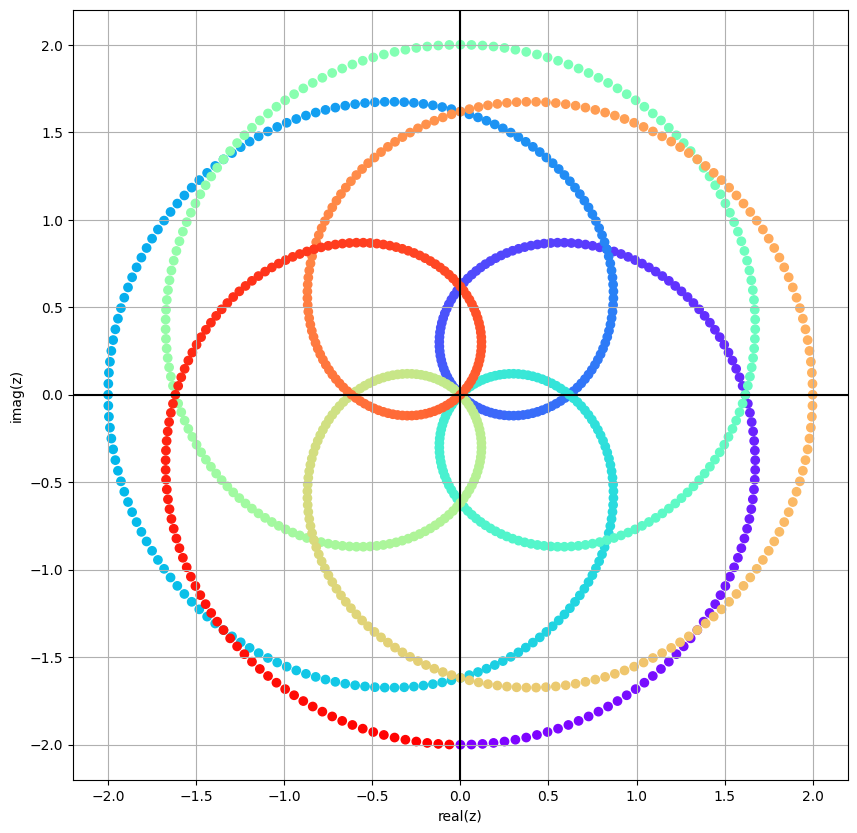

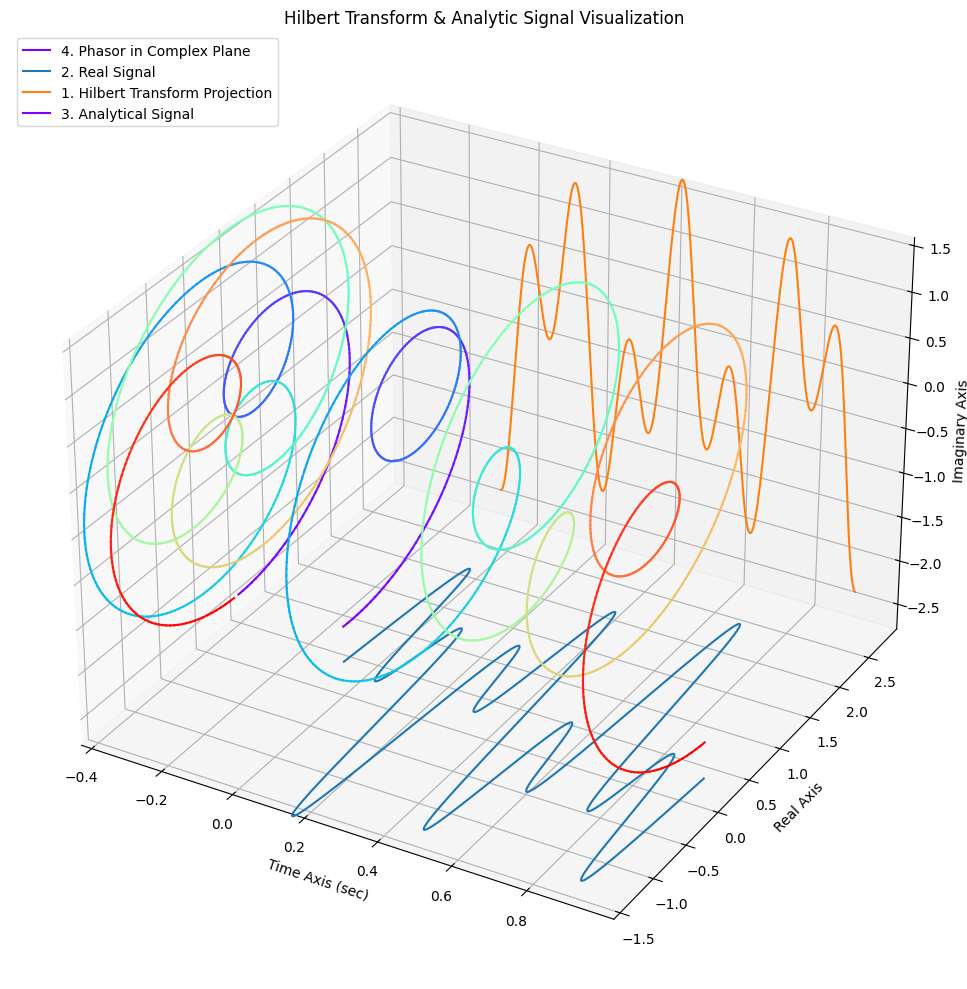

'\nsmall jumps --> crosses threw the center/origin (0,0)\n'

In [15]:
scatter_z(z2)
plot_analytic_signal_3d(t, z2)
'''
small jumps --> crosses threw the center/origin (0,0)
'''

### More complex signal

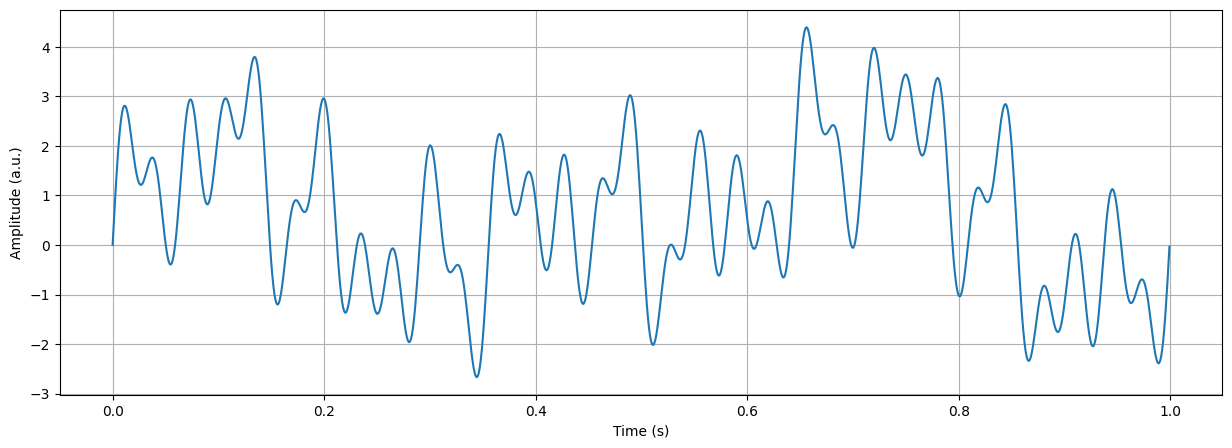

In [16]:
# Six frequency components
freqs = [0.3, 1.9, 3, 11, 17, 31]

# Sum up the individual freq. components
x3 = np.zeros(N)
for f in freqs:
    x3 += np.sin(2*np.pi*f/fs*n)

# Plot the new signal
plot_x(x3,t)

### Calculate and plot instantantaneous amplitude, phase and frequency of new signal

'\nphase not linear any more --> goes down even without jumps --> negative frequencies \n--> not an error! --> direction in complex plane changes (compared to origin) \n--> dips into the negative --> small loops in complex plane\nnegative frequencies mean going the other way around in complex plane\n'

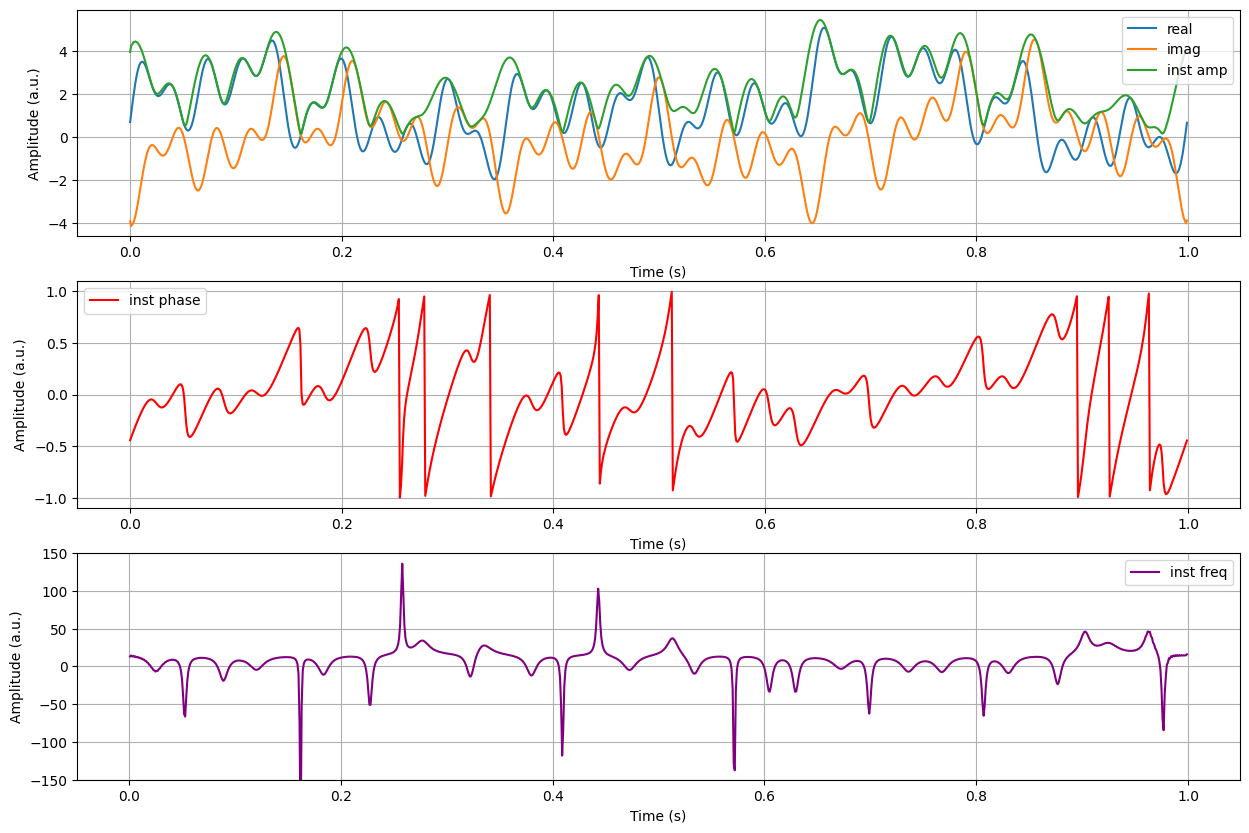

In [17]:
z3 = analytic_signal(x3)
plot_z(z3,t,fs,[-150,150])

'''
phase not linear any more --> goes down even without jumps --> negative frequencies 
--> not an error! --> direction in complex plane changes (compared to origin) 
--> dips into the negative --> small loops in complex plane
negative frequencies mean going the other way around in complex plane
'''

### Show complex plane of new signal

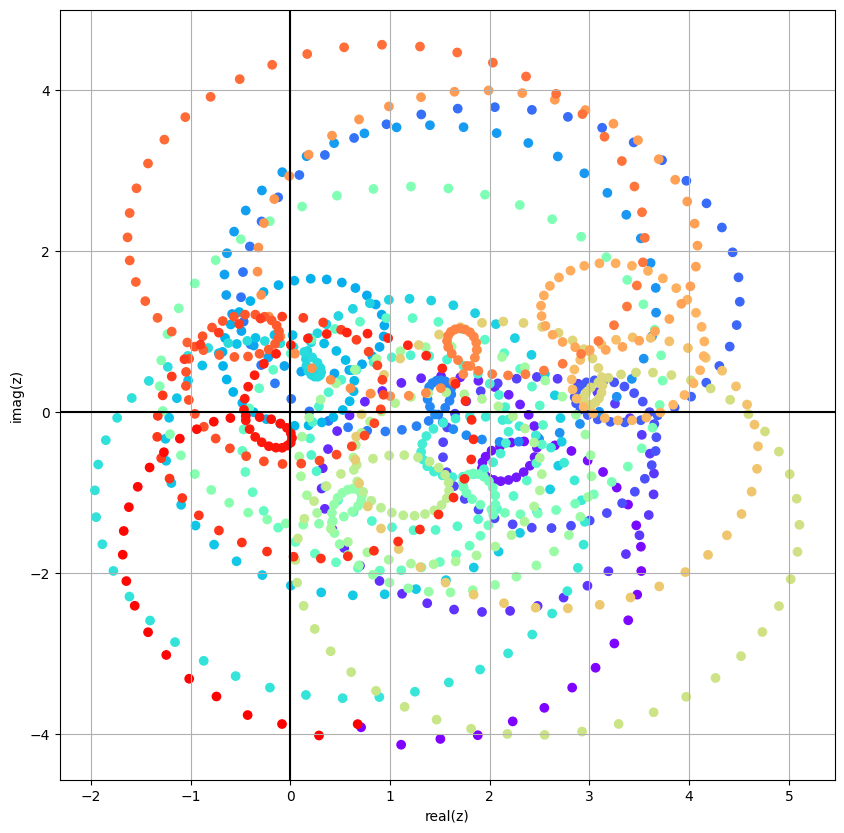

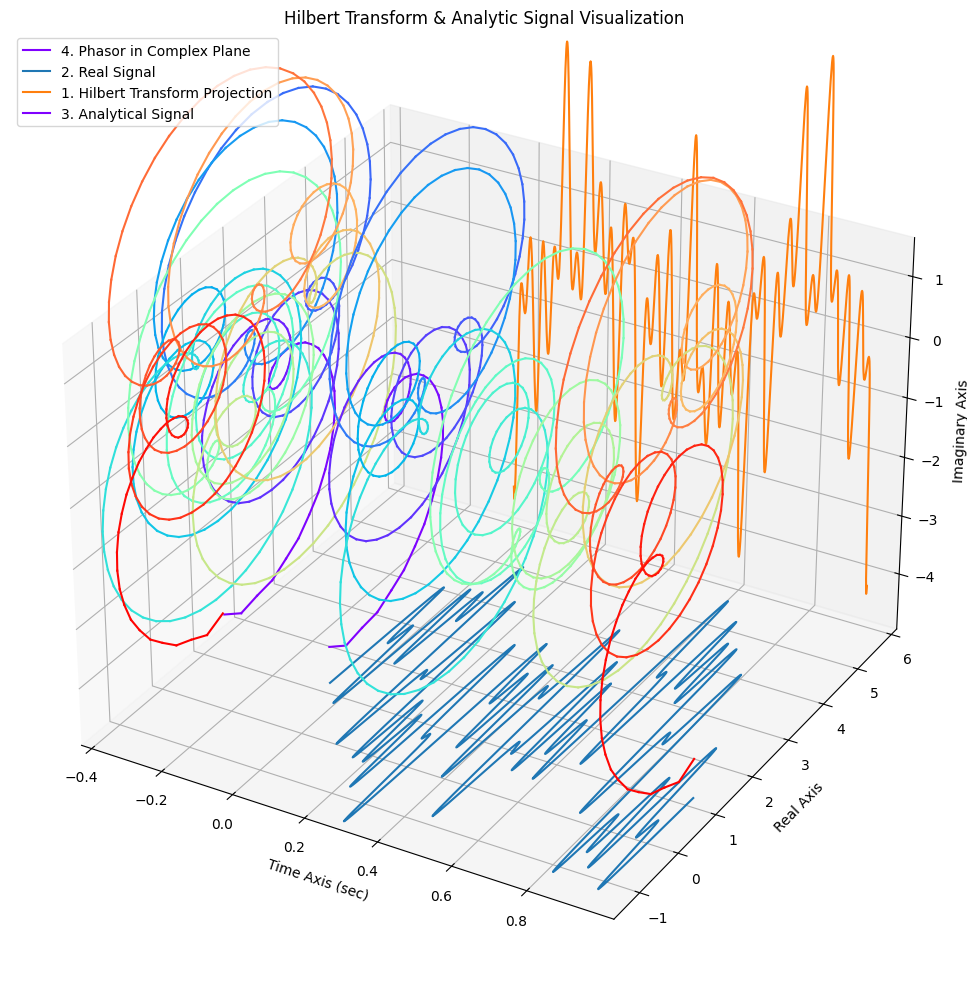

In [18]:
scatter_z(z3)
plot_analytic_signal_3d(t, z3)

## Amplitude and Frequency Modulation

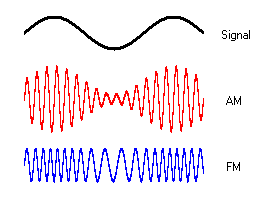
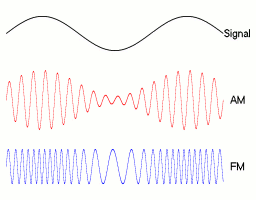
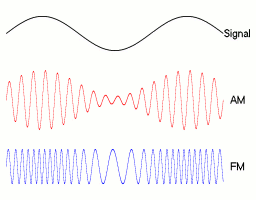
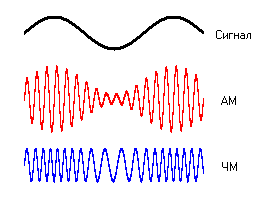
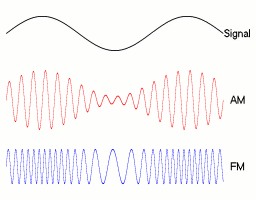

([Source](https://en.m.wikipedia.org/wiki/File:Amfm3-en-de.gif))

### Amplitude modulated signal

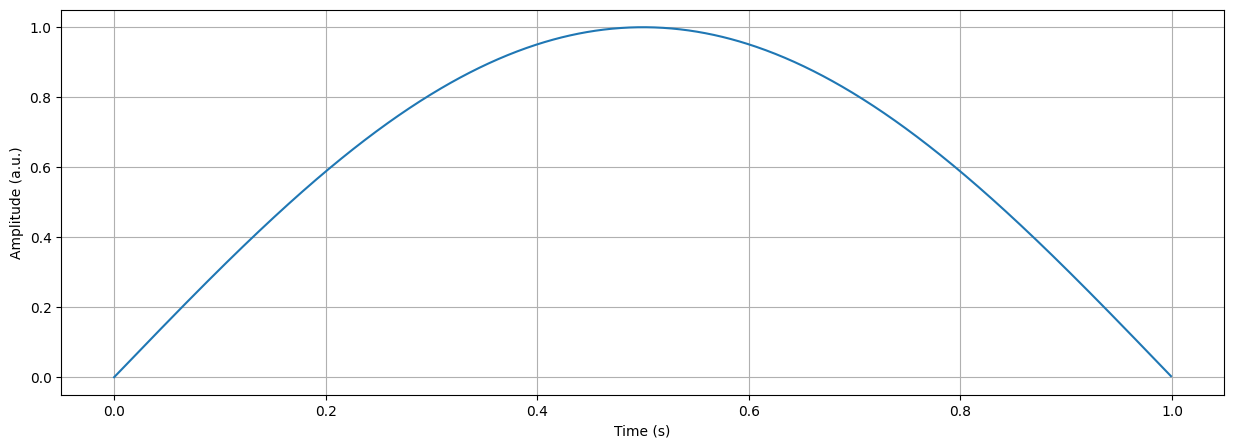

In [19]:
# amplitude modulated signal: combination of two signals

# modulator: signal we want to transmit (actual interesting signal)
fm = 0.5

'''
Try both signals xm
'''
xm = np.sin(2*np.pi*fm/fs*n)
#xm = np.arange(N)/N 

plot_x(xm,t)

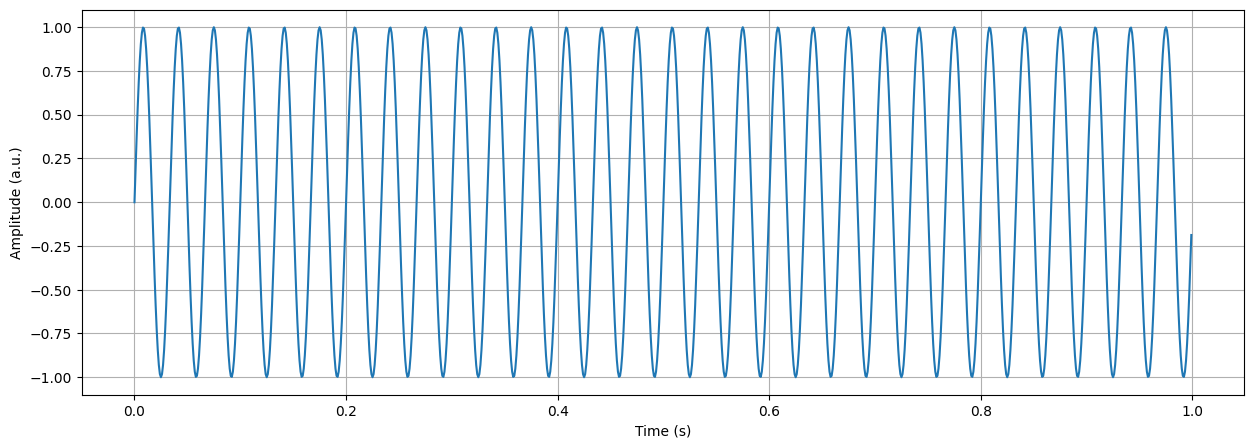

In [20]:
# carrier: signal, that carries our interesting signal (transfer interesting signal)
fc = 30
xc = np.sin(2*np.pi*fc/fs*n)

plot_x(xc,t)

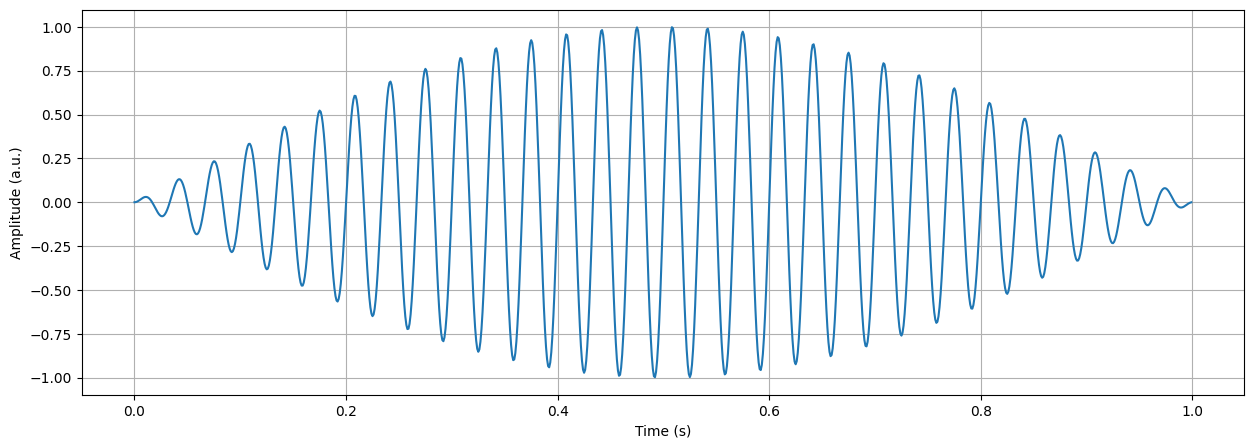

'same osciallations as carrier\nsame shape (amplitude) we want to transmit'

In [21]:
# Amplitdue modulated signal
x_am = xc * xm

plot_x(x_am, t)

'''same osciallations as carrier
same shape (amplitude) we want to transmit'''

'\ninst amp (envelope) has the shape of our signal of interest\nuse carrier signal to transmit it, not interested in osciallations\ninst freq: edge effects at beginning and end (signal is not infinitely long)\n'

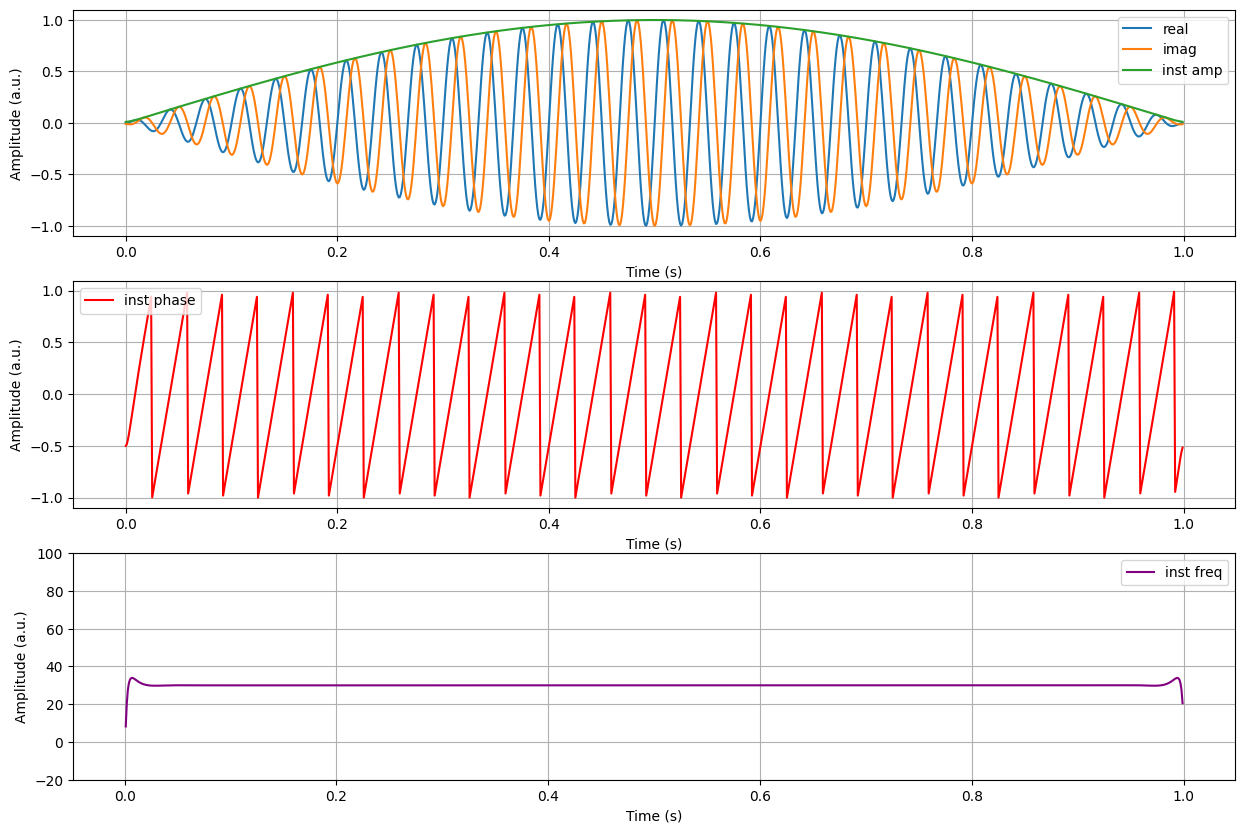

In [22]:
z_am = analytic_signal(x_am)
plot_z(z_am, t, fs, [-20,100])

'''
inst amp (envelope) has the shape of our signal of interest
use carrier signal to transmit it, not interested in osciallations
inst freq: edge effects at beginning and end (signal is not infinitely long)
'''

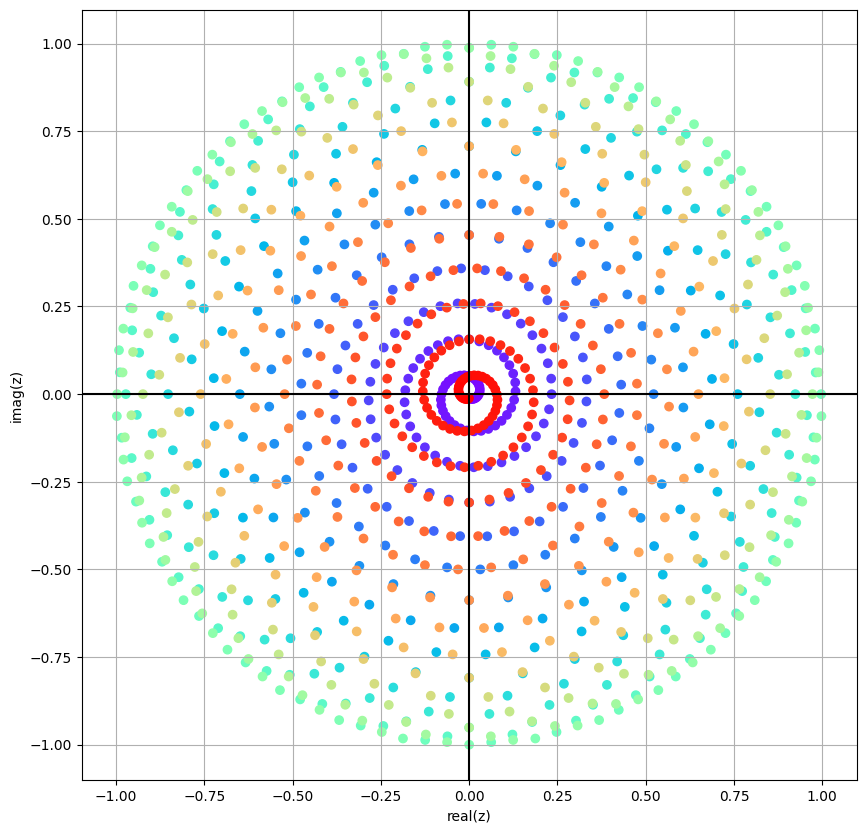

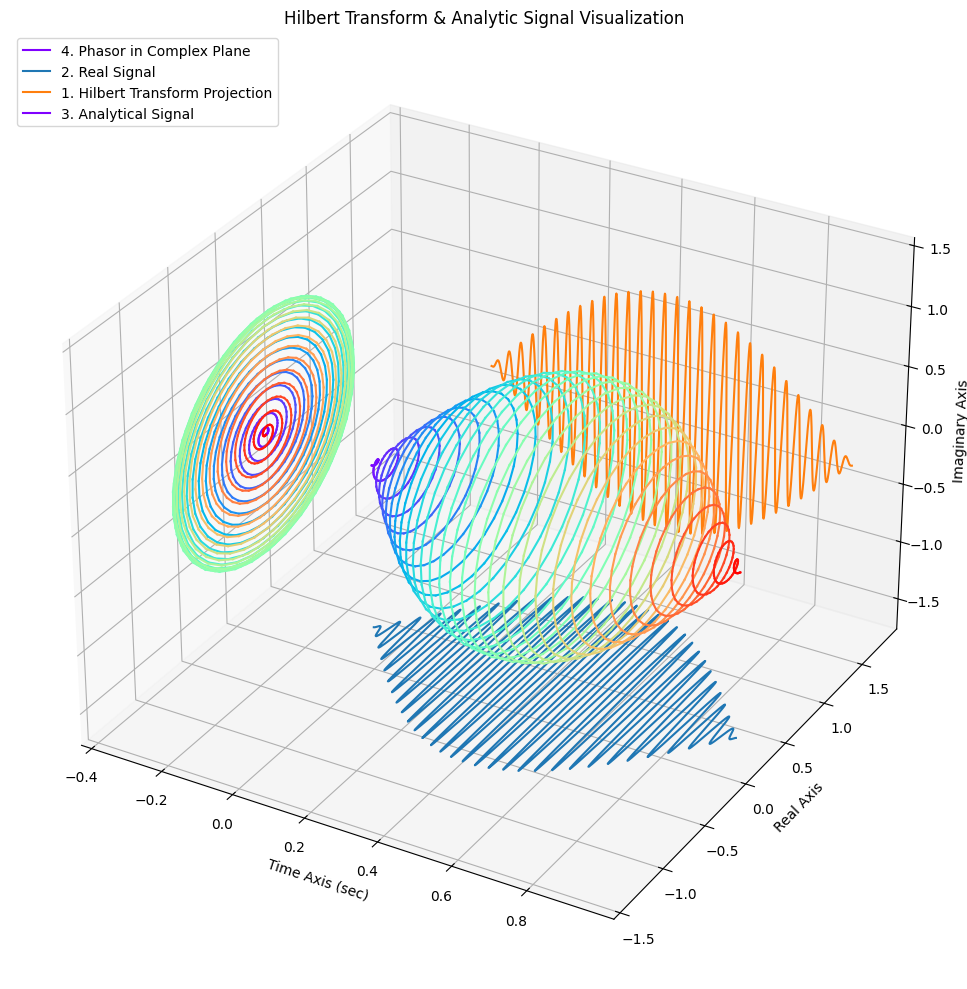

'\n signal starts at zero --> amplitude gets bigger --> amplitude gets smaller again\n'

In [23]:
scatter_z(z_am)
plot_analytic_signal_3d(t, z_am)

'''
 signal starts at zero --> amplitude gets bigger --> amplitude gets smaller again
'''

### Frequency Modulation

(Phase Modulation to be specific)

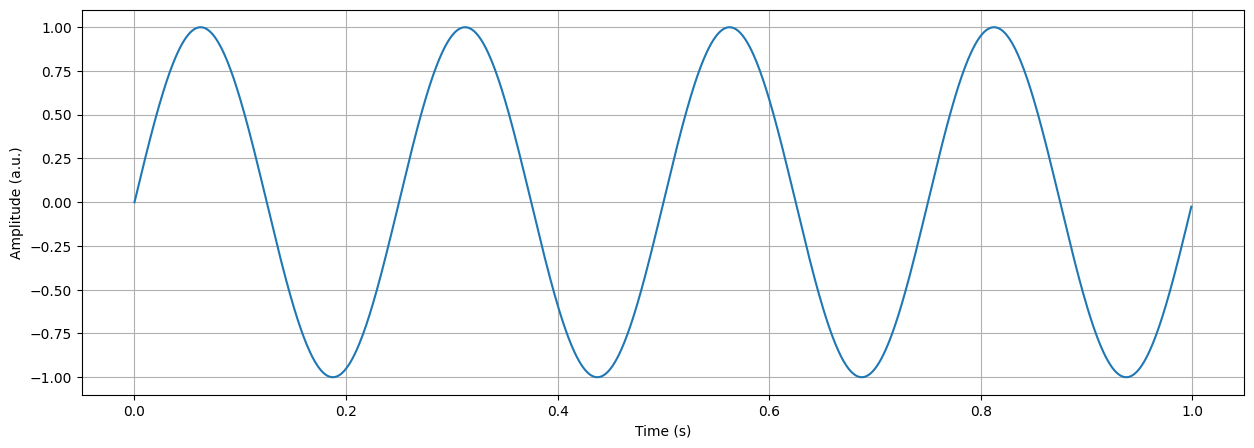

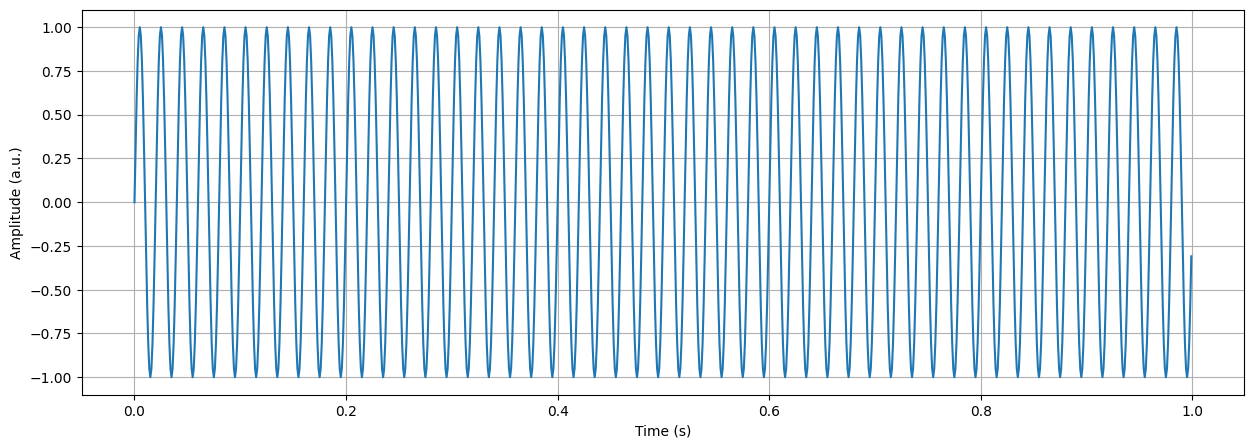

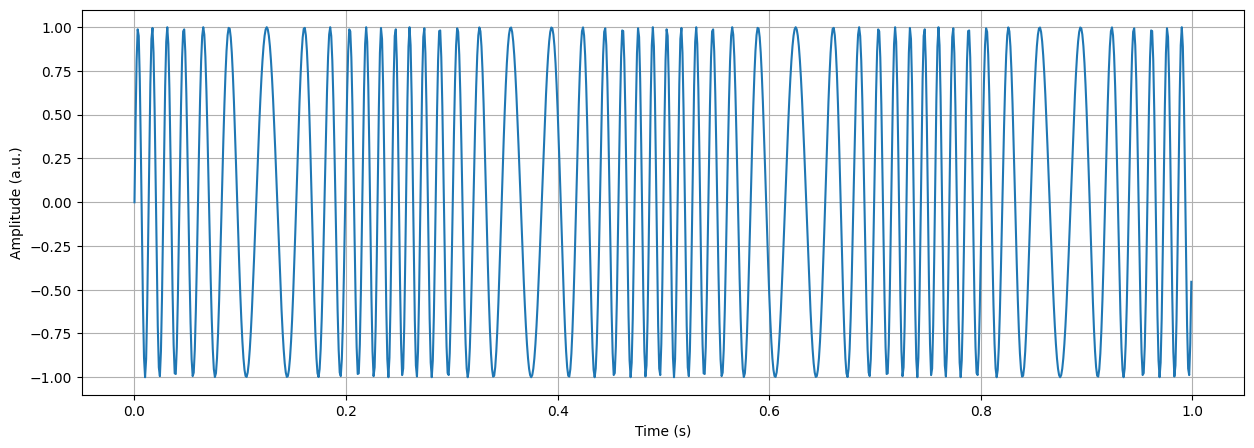

'\nfrequency does not change as expected --> slope of modulator signal determines the frequency of x_fm\npositive slope --> increase frequency\nnegative slope --> decrease frequency\n--> this is Phase Modulation (PM) to be precise \n--> signal is encoded as slope of the modulator signal\n--> frequency modulation is a bit different, but this is the basic idea\n'

In [35]:
# frequency modulated signal

# modulator
fm = 4

'''
Try both signals xm
'''
# xm = np.zeros(N)
# xm[0:250] = np.arange(250)/250
# xm[250:750] = np.arange(250,-250,-1)/250
# xm[750:] = np.arange(-250,0)/250

xm = np.sin(2*np.pi*(fm/fs*n))


# carrier
fc = 50
xc = np.sin(2*np.pi*fc/fs*n) # xc is not used any further since 

# modulation factor: modulate frequency mf times stronger
mf = 1

# add modulator signal to phase of carrier signal
x_fm = np.sin(2*np.pi*(fc*t + xm*mf))

# Modulator signal
plot_x(xm,t)
# Carrier signal
plot_x(xc,t)

# Frequncy modulated signal
plot_x(x_fm,t)

'''
frequency does not change as expected --> slope of modulator signal determines the frequency of x_fm
positive slope --> increase frequency
negative slope --> decrease frequency
--> this is Phase Modulation (PM) to be precise 
--> signal is encoded as slope of the modulator signal
--> frequency modulation is a bit different, but this is the basic idea
'''

'\ninst. ampl. is constant\ninst. frequency: oscillation, but different (cosine) than modulator signal (sine) --> not a delay\ninst. phase: looks more like the slope of original signal --> take integral\n'

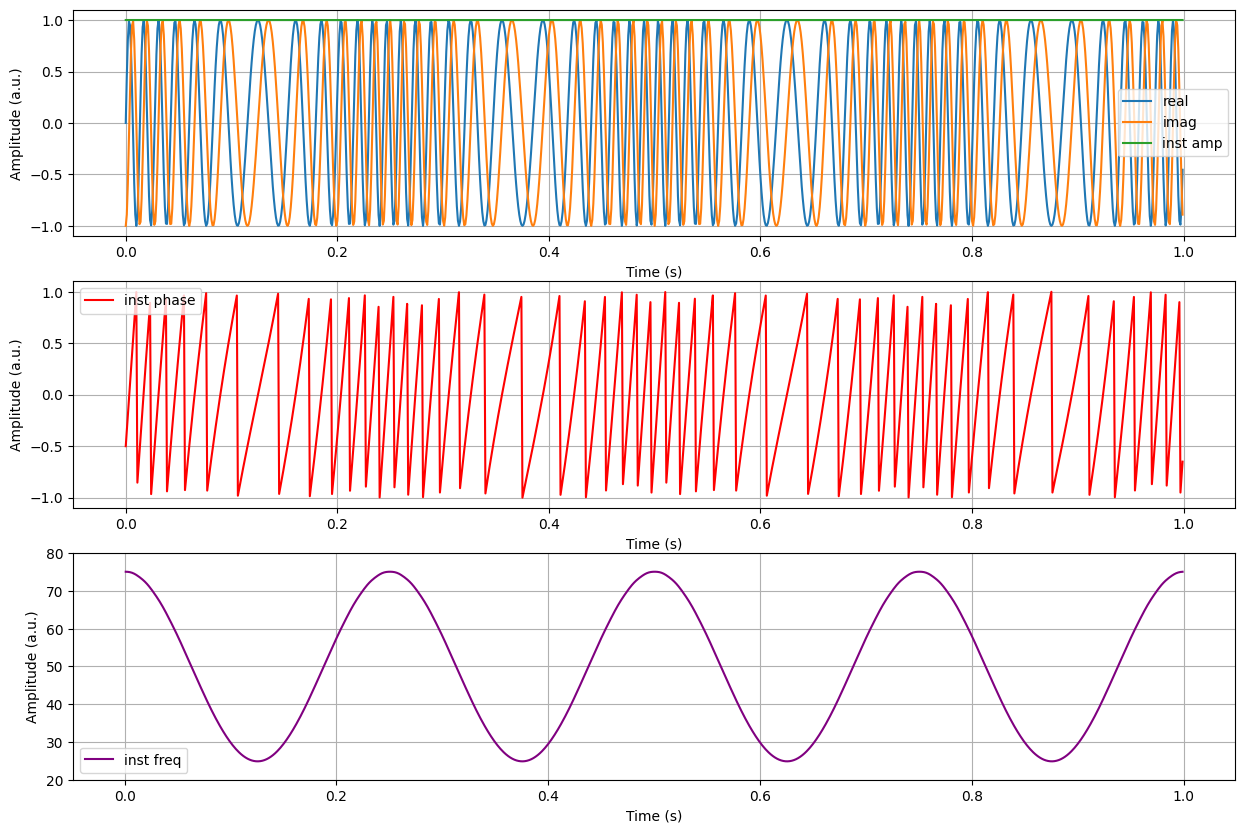

In [36]:
z_fm = analytic_signal(x_fm)
plot_z(z_fm,t,fs,[20,80])

'''
inst. ampl. is constant
inst. frequency: oscillation, but different (cosine) than modulator signal (sine) --> not a delay
inst. phase: looks more like the slope of original signal --> take integral
'''

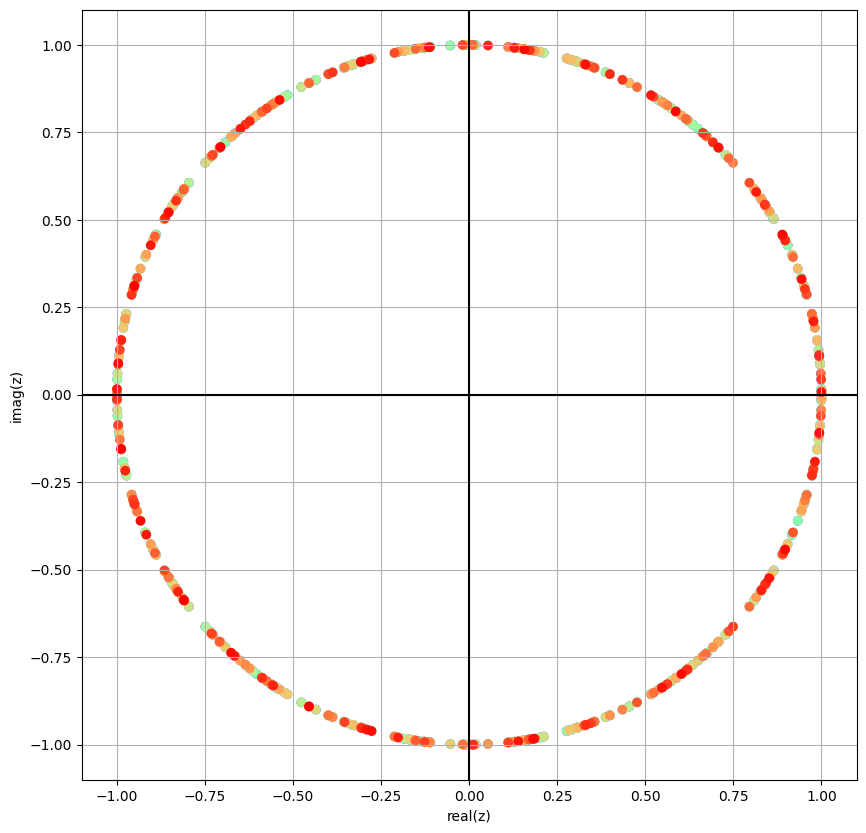

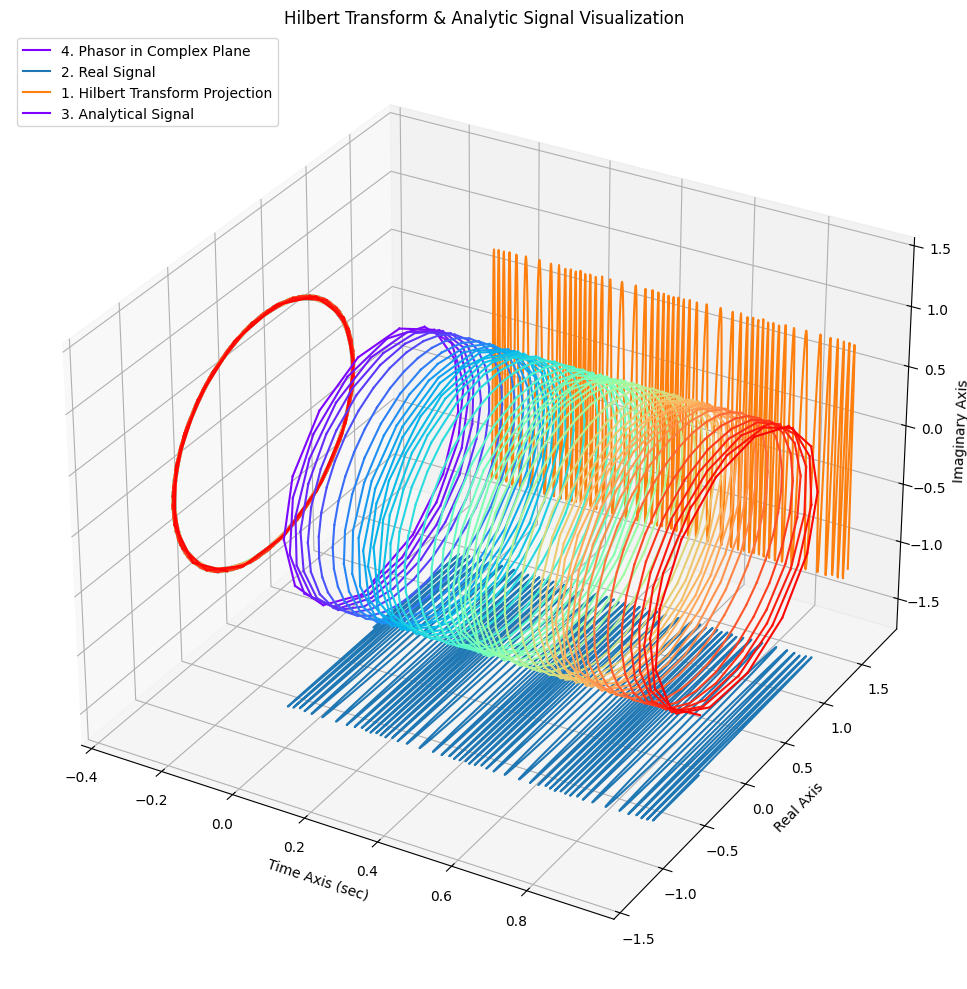

In [37]:
scatter_z(z_fm)
plot_analytic_signal_3d(t, z_fm)

### Demodulate signal

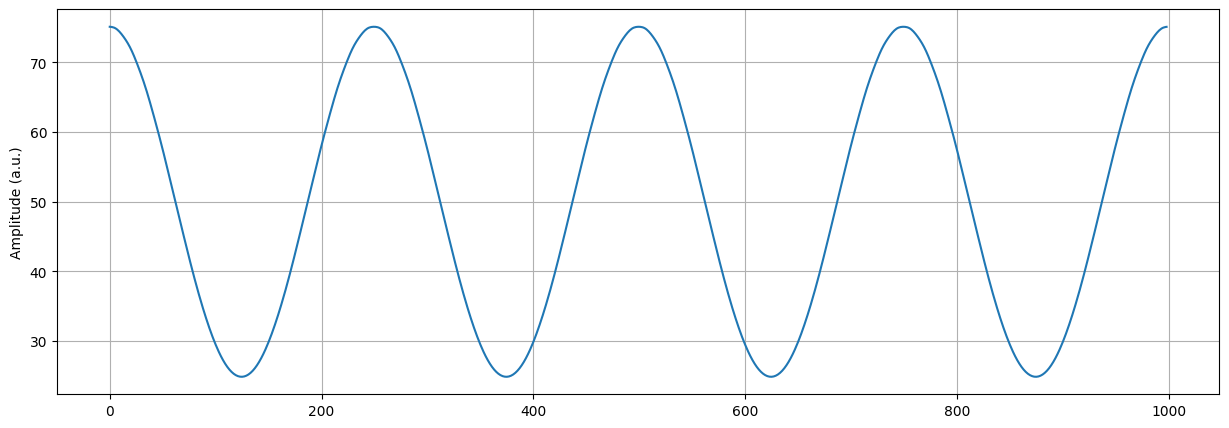

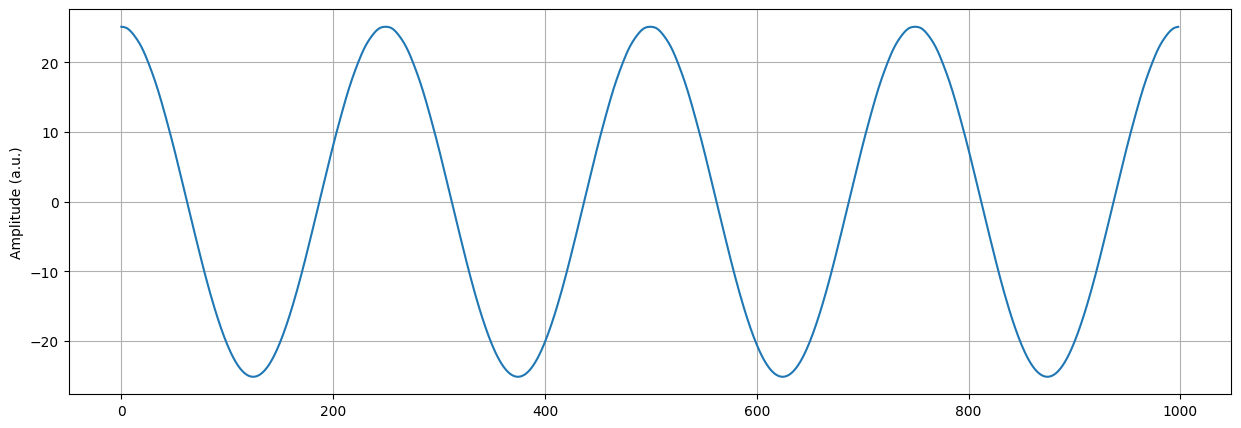

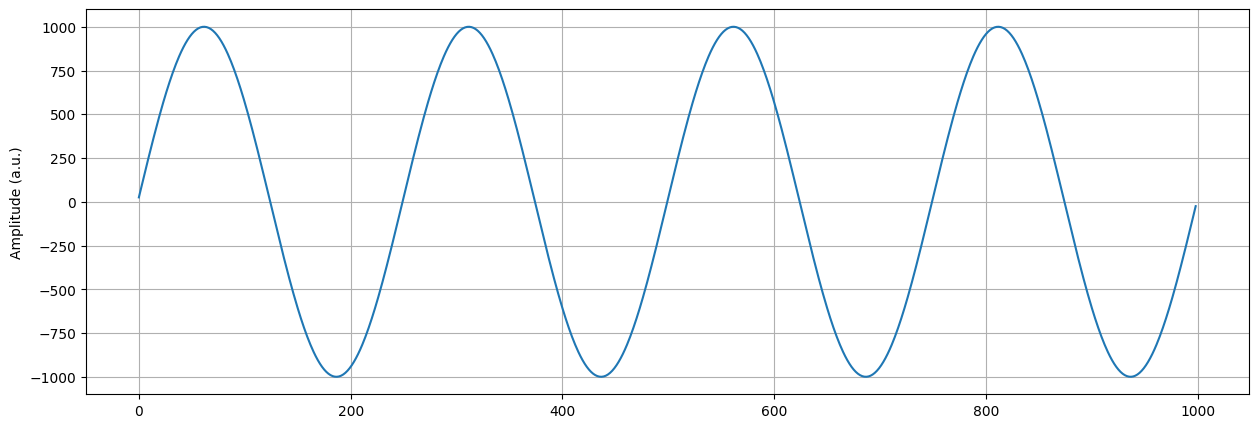

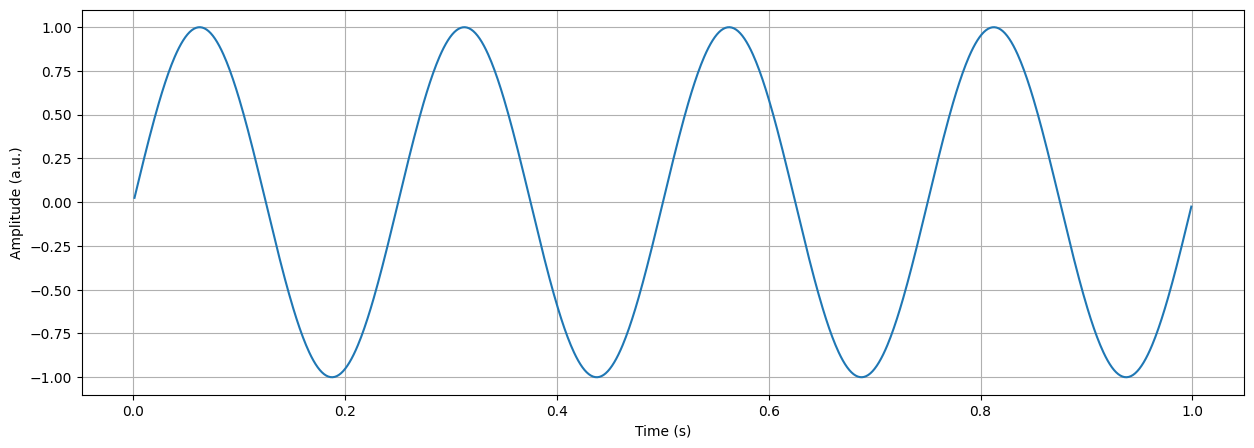

In [ ]:
# Calculate inst. frequency
inst_freq = np.diff(np.unwrap(np.angle(z_fm))) / (2*np.pi)*fs

plot_x(inst_freq)
plot_x(inst_freq-fc)

# Demodulate
'''
integral(discrete) = cumulative sum divided by length (and modulator factor),
subtract carrier frequency
'''
xm_demod = np.cumsum((inst_freq-fc)) * (1/fs) / mf 

plot_x(xm_demod,t[1:])
